# Interactive Graph Visualisation

---

## 0. Setup and Loading package

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [1]:
import ipyleaflet

import geograph
from geograph.visualisation import geoviewer
from geograph.constants import UTM35N
from geograph.demo.binder_constants import DATA_DIR

---

## 1. Loading Data

/home/users/svm/Code/gtc-biodiversity/env2/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


Number of patches in region of interest: 323


,OBJECTID,N_Eunis,Eunis_name,Shape_Leng,Shape_Area,Leg,AREA,geometry
0,65,D1.11,"Active, relatively undamaged raised bogs",3244.211911,3.767096e+05,2,37.6710,"POLYGON Z ((522663.501 5717738.222 0.000, 5227..."
1,67,D1.11,"Active, relatively undamaged raised bogs",2970.146257,3.165971e+05,2,31.6597,"POLYGON Z ((525143.664 5719878.230 0.000, 5252..."
2,68,D1.11,"Active, relatively undamaged raised bogs",2182.893205,2.663976e+05,2,26.6398,"POLYGON Z ((521759.472 5720117.848 0.000, 5221..."
3,69,D1.11,"Active, relatively undamaged raised bogs",3881.473848,4.075725e+05,2,40.7573,"POLYGON Z ((519901.603 5719846.246 0.000, 5198..."
4,70,D1.11,"Active, relatively undamaged raised bogs",6549.770969,1.363278e+06,2,136.3280,"POLYGON Z ((530088.099 5720147.705 0.000, 5300..."


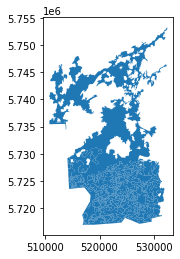

In [2]:
import pathlib
import geopandas as gpd

# Loading Polesia data 
data_path = DATA_DIR / "polesia" / "polesia_landcover_sample.gpkg"
gdf = gpd.read_file(data_path)

# Looking at south-west corner of data
# Choosen because are of wilderness as discussed
minx, miny, maxx, maxy = gdf.total_bounds
square_len = 25000

gdf = gdf.cx[ minx:minx+square_len  ,  miny:miny+square_len]

print("Number of patches in region of interest:", len(gdf))
gdf.plot()
gdf.head(5)

---

## 2. Creating `GeoGraph`

In [3]:
# Building the main graph structure
graph = geograph.GeoGraph(gdf, 
                          crs=UTM35N, 
                          columns_to_rename={"Eunis_name":"class_label","AREA":"area"})

Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 323/323 [00:00<00:00, 569.78it/s]
Step 2 of 2: Adding edges: 100%|██████████| 323/323 [00:00<00:00, 66710.67it/s]

Graph successfully loaded with 323 nodes and 816 edges.


---

## 3. Creating Habitats

In [4]:
# First selecting the classes that make up our habitat
# We chose all classes with 'pine' in the name.
pine_classes = [label for label in graph.df.class_label.unique() if 'pine' in label]
pine_classes

['Subcontinental moss Scots pine forests',
 'Subcontinental lichen Scots pine forests',
 'Subcontinental moorgrass Scots pine forests',
 'Boreal Labrador tea Scots pine bog woods',
 'Boreal cottonsedge Scots pine bog woods',
 'Boreal neutrocline sphagnum Scots pine fen woods',
 'Mixed Scots pine-birch woodland']

In [5]:
# Distances: mobile (<100m), semi mobile (<25m) and sessile (<5m) 
# (proposed by Adham Ashton-Butt at BTO)
graph.add_habitat('Sessile', 
                  max_travel_distance=5, 
                  valid_classes=pine_classes)

graph.add_habitat('Semi mobile', 
                  max_travel_distance=25, 
                  valid_classes=pine_classes)

graph.add_habitat('Mobile',
                  max_travel_distance=500, 
                  valid_classes=pine_classes)

Constructing graph: 100%|██████████| 39/39 [00:00<00:00, 11990.75it/s]


Calculating components...
Habitat successfully loaded with 95 nodes and 78 edges.


Constructing graph: 100%|██████████| 36/36 [00:00<00:00, 12607.08it/s]


Calculating components...
Habitat successfully loaded with 95 nodes and 86 edges.


Constructing graph: 100%|██████████| 14/14 [00:00<00:00, 7885.09it/s]

Calculating components...
Habitat successfully loaded with 95 nodes and 214 edges.


---

## 4. Interactive Graph

In [6]:
viewer = geoviewer.GeoGraphViewer(small_screen=True)
viewer.add_layer(ipyleaflet.basemaps.Esri.WorldImagery)
viewer.add_graph(graph, name='Polesia data', with_components=True)
viewer.enable_graph_controls()
viewer

Constructing graph: 100%|██████████| 14/14 [00:00<00:00, 7224.44it/s]


GeoGraphViewer(center=[51.389167, 30.099444], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom…